# **Air Quality Index Exploration**

This notebook contains an in-depth analysis of air quality across Indian cities, using Python for data processing, visualization, and statistical exploration.  
The project addresses the following key questions:
- Which cities and states are the most polluted?
- What are the dominant pollutants in different regions?
- How is AQI distributed across various categories?
- What trends are observed in air quality and pollutants over time?
- How can clustering help group cities based on pollution profiles?

**Datasets Used:**
1. **City Day Air Quality Dataset**: Contains city-wise daily pollutant measurements and AQI.
2. **Indian Cities Database**: Includes geographic and administrative information about cities in India.

**Tools and Libraries:**
- Python libraries: `pandas`, `numpy`, `matplotlib`and `seaborn`.
- Visualizations: Line plots, bar charts, and clustering visualizations.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
city_day = pd.read_csv("city_day.csv")
indian_cities = pd.read_csv("Indian Cities Database.csv")

### **Preview of City Day Air Quality Dataset**

In [ ]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### **Preview of Indian Cities Dataset**

In [5]:
indian_cities.head()  

,City,Lat,Long,country,iso2,State
0,Abohar,30.144533,74.195520,India,IN,Punjab
1,Adilabad,19.400000,78.310000,India,IN,Telangana
2,Agartala,23.836049,91.279386,India,IN,Tripura
3,Agra,27.187935,78.003944,India,IN,Uttar Pradesh
4,Ahmadnagar,19.094571,74.738432,India,IN,Maharashtra


### **Dataset Summary: City Day Air Quality Dataset and Indian Cities Dataset**

In [5]:
city_day.info()
indian_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 column

### **Identifying Missing Values in Datasets**

In [ ]:
city_day_missing = city_day.isnull().sum()
indian_cities_missing = indian_cities.isnull().sum()
city_day_missing, indian_cities_missing

(City              0
 Date              0
 PM2.5          4598
 PM10          11140
 NO             3582
 NO2            3585
 NOx            4185
 NH3           10328
 CO             2059
 SO2            3854
 O3             4022
 Benzene        5623
 Toluene        8041
 Xylene        18109
 AQI            4681
 AQI_Bucket     4681
 dtype: int64,
 City       0
 Lat        0
 Long       0
 country    0
 iso2       0
 State      0
 dtype: int64)

### **Handling Missing Values In Dataset**

In [ ]:
numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
city_day[numeric_columns] = city_day[numeric_columns].fillna(city_day[numeric_columns].mean())
city_day['AQI_Bucket'] = city_day['AQI_Bucket'].fillna('Unknown')
city_day_cleaned_missing = city_day.isnull().sum()
city_day_cleaned_missing

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

### **Distribution of AQI Across Cities**

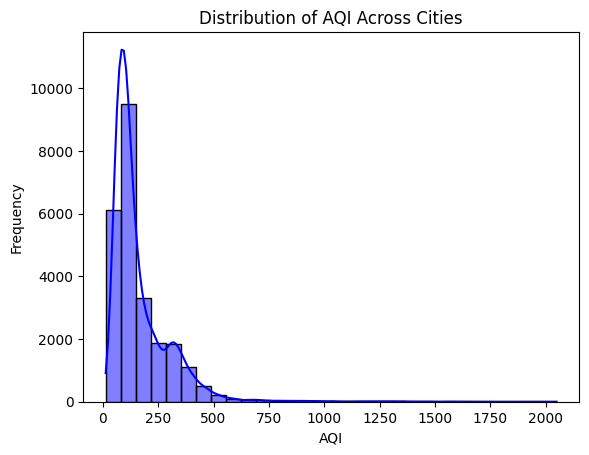

In [7]:
#Conclusion: The histogram will show the overall air quality trend (e.g., if most cities fall into moderate or poor AQI categories).
sns.histplot(city_day['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of AQI Across Cities')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


### **Average Pollutants by AQI Bucket**

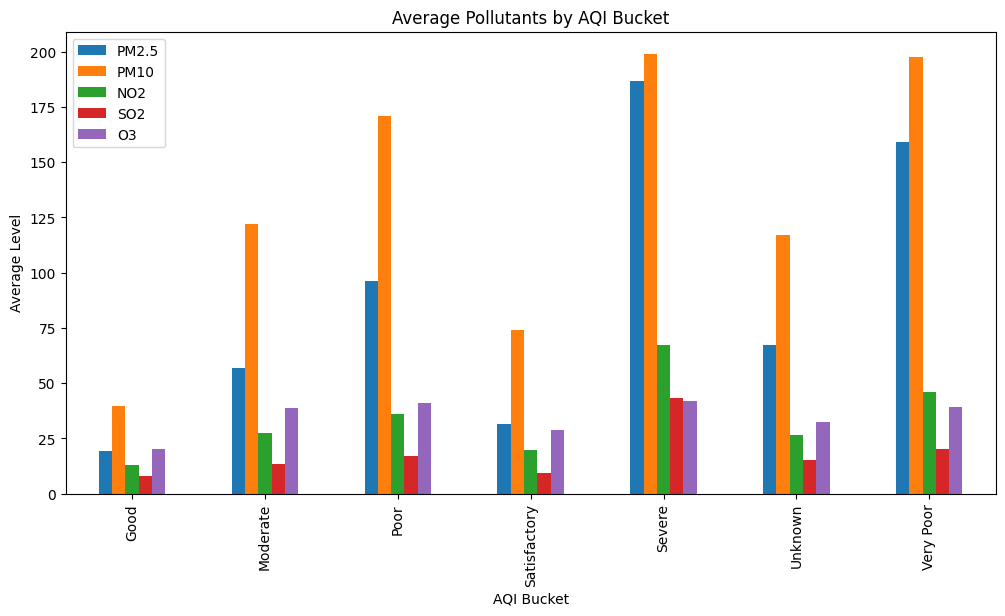

In [25]:
#Conclusion: This bar chart will reveal which pollutants dominate specific AQI categories (e.g., high PM2.5 levels might align with "Very Poor").
aqi_pollutants = city_day.groupby('AQI_Bucket')[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3']].mean()
aqi_pollutants.plot(kind='bar', figsize=(12, 6))
plt.title('Average Pollutants by AQI Bucket')
plt.ylabel('Average Level')
plt.xlabel('AQI Bucket')
plt.show()

### **Correlation Between Pollutants**

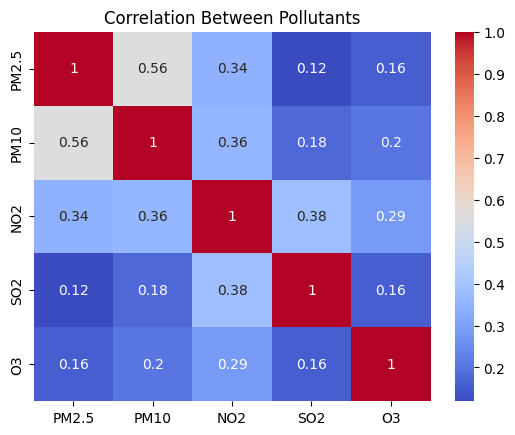

In [27]:
#Conclusion: Strong correlations, like between PM2.5 and PM10, might indicate shared sources (e.g., vehicular emissions).
corr_matrix = city_day[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants')
plt.show()

### **Top 10 Cities by Average PM2.5 Levels**

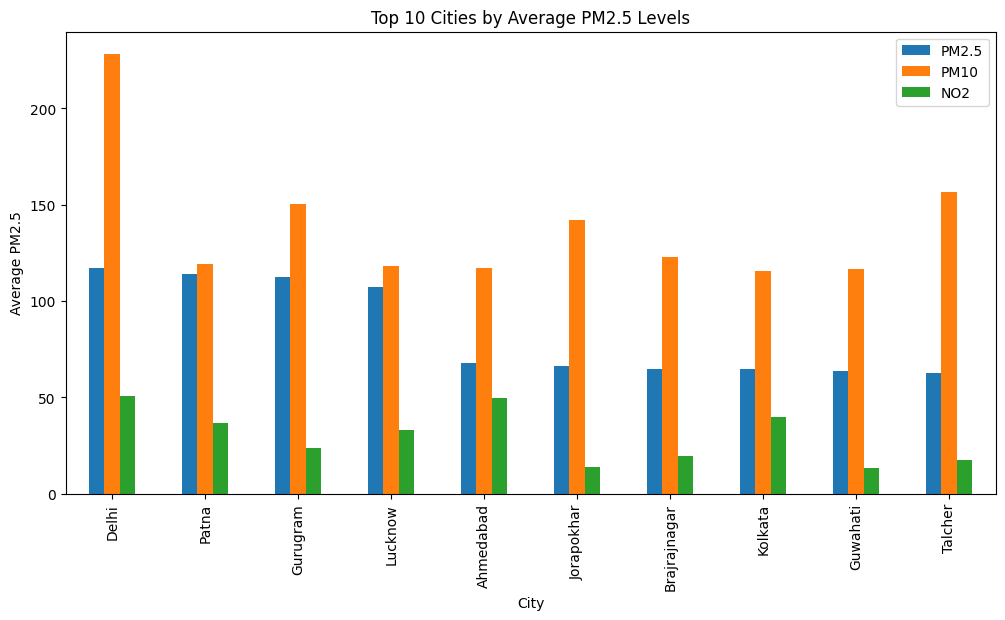

In [29]:
#Conclusion: Identify cities with the worst air quality and prioritize areas for intervention.
city_pollutants = city_day.groupby('City')[['PM2.5', 'PM10', 'NO2']].mean().sort_values('PM2.5', ascending=False).head(10)
city_pollutants.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Cities by Average PM2.5 Levels')
plt.ylabel('Average PM2.5')
plt.show()

### **Geographic Distribution of Cities**

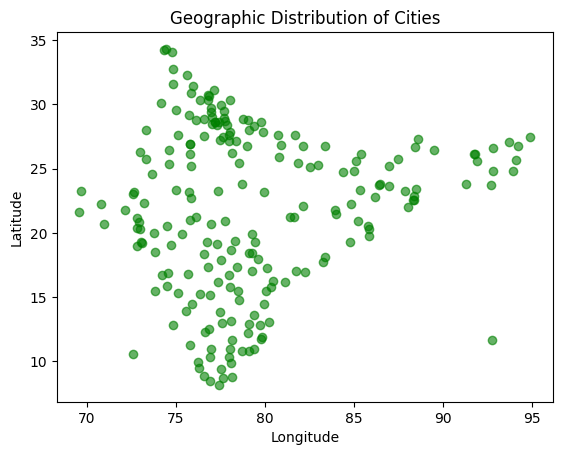

In [31]:
#Conclusion: Helps visualize how cities are distributed across India and check if there are clusters or regions.
plt.scatter(indian_cities['Long'], indian_cities['Lat'], alpha=0.6, color='green')
plt.title('Geographic Distribution of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [32]:
#Merging city_day and indian_cities
merged_df = pd.merge(city_day, indian_cities, on='City', how='inner')

### **Geographic Distribution of AQI Levels**

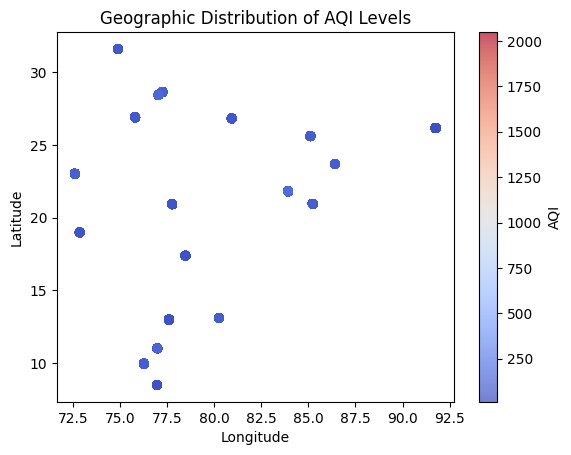

In [33]:
#Conclusion: Visualize how AQI varies regionally, identifying pollution hotspots.
plt.scatter(merged_df['Long'], merged_df['Lat'], c=merged_df['AQI'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='AQI')
plt.title('Geographic Distribution of AQI Levels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### **Average AQI by State**

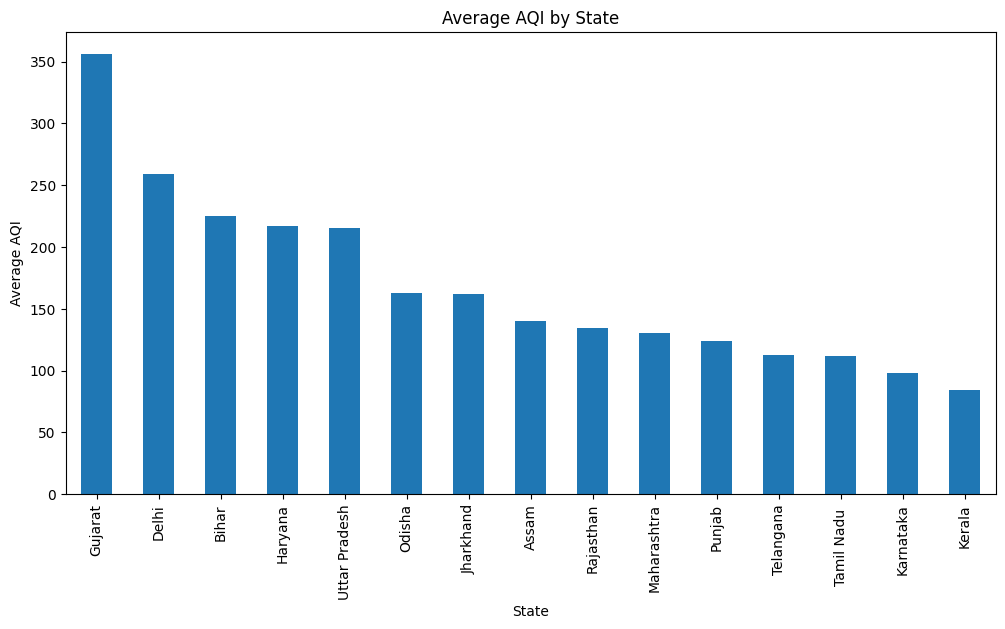

In [34]:
#Conclusion: Identify states with higher pollution levels and prioritize interventions accordingly.
state_aqi = merged_df.groupby('State')['AQI'].mean().sort_values(ascending=False)
state_aqi.plot(kind='bar', figsize=(12, 6))
plt.title('Average AQI by State')
plt.xlabel('State')
plt.ylabel('Average AQI')
plt.show()

### **State-wise Average Pollutant Levels**

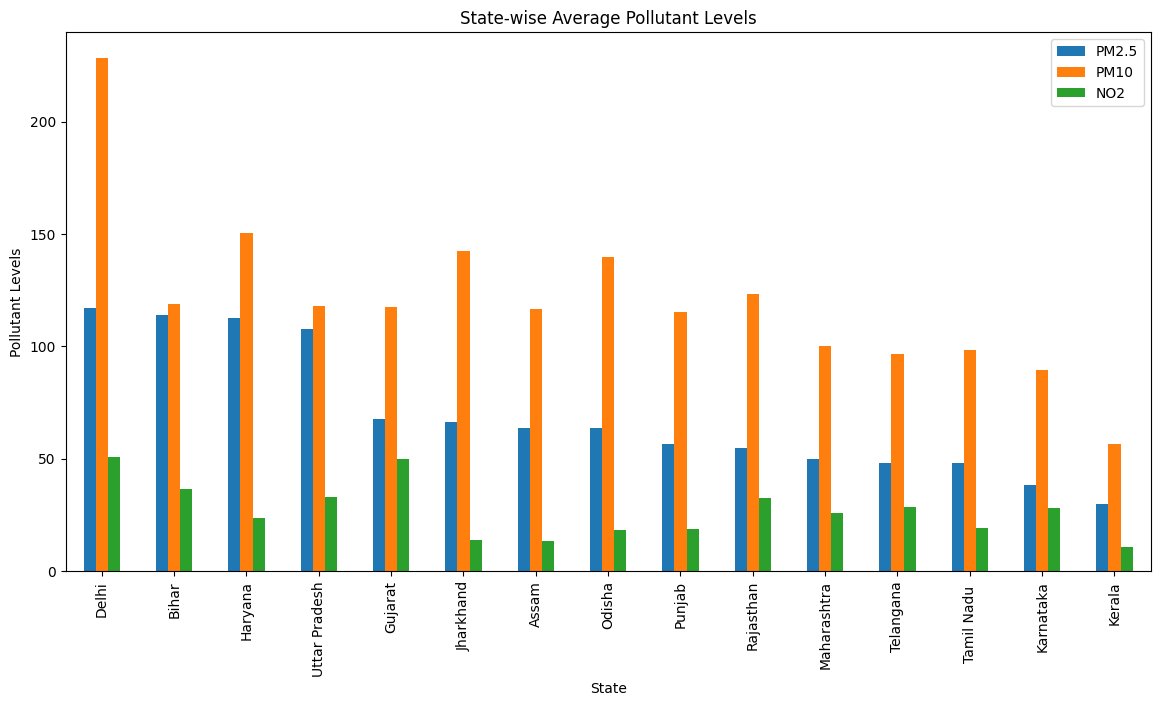

In [35]:
#Conclusion: Highlight states contributing the most to specific pollutants.
state_pollutants = merged_df.groupby('State')[['PM2.5', 'PM10', 'NO2']].mean().sort_values('PM2.5', ascending=False)
state_pollutants.plot(kind='bar', figsize=(14, 7))
plt.title('State-wise Average Pollutant Levels')
plt.ylabel('Pollutant Levels')
plt.show()

### **City-wise Average AQI Analysis**

In [42]:
#This identifies the cities that require immediate attention and those with relatively good air quality. It provides a clear picture of the most and least polluted regions.

# Calculate average AQI for each city
city_avg_aqi = city_day.groupby('City')['AQI'].mean().sort_values(ascending=False)

# Top 10 most polluted cities
print("Top 10 Most Polluted Cities:")
print(city_avg_aqi.head(10))

# Top 10 least polluted cities
print("\nTop 10 Least Polluted Cities:")
print(city_avg_aqi.tail(10))

Top 10 Most Polluted Cities:
City
Ahmedabad       356.144807
Delhi           259.024707
Patna           224.822373
Gurugram        217.227975
Lucknow         214.998893
Talcher         171.310522
Jorapokhar      161.707019
Brajrajnagar    154.162373
Mumbai          142.889029
Kolkata         142.475203
Name: AQI, dtype: float64

Top 10 Least Polluted Cities:
City
Hyderabad             112.803794
Kochi                 105.820088
Amaravati             103.531014
Bengaluru              97.873516
Chandigarh             97.649072
Ernakulam              96.476372
Shillong               91.957020
Coimbatore             83.190338
Thiruvananthapuram     80.766021
Aizawl                 37.096701
Name: AQI, dtype: float64


#### **Dominant Pollutants for Top 10 Cities:**

In [43]:
#This identifies the primary pollutant for each city, enabling region-specific interventions (e.g., controlling industrial emissions in cities where SO2 dominates).
# Calculate city-wise average levels for key pollutants
city_pollutants = city_day.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3']].mean()

# Identify the dominant pollutant for each city
city_pollutants['Dominant Pollutant'] = city_pollutants.idxmax(axis=1)

# Print the first 10 cities and their dominant pollutant
print(city_pollutants[['Dominant Pollutant']].head(10))


             Dominant Pollutant
City                           
Ahmedabad                  PM10
Aizawl                     PM10
Amaravati                  PM10
Amritsar                   PM10
Bengaluru                  PM10
Bhopal                     PM10
Brajrajnagar               PM10
Chandigarh                 PM10
Chennai                    PM10
Coimbatore                 PM10


### **State-wise Distribution of Pollutants and AQI**

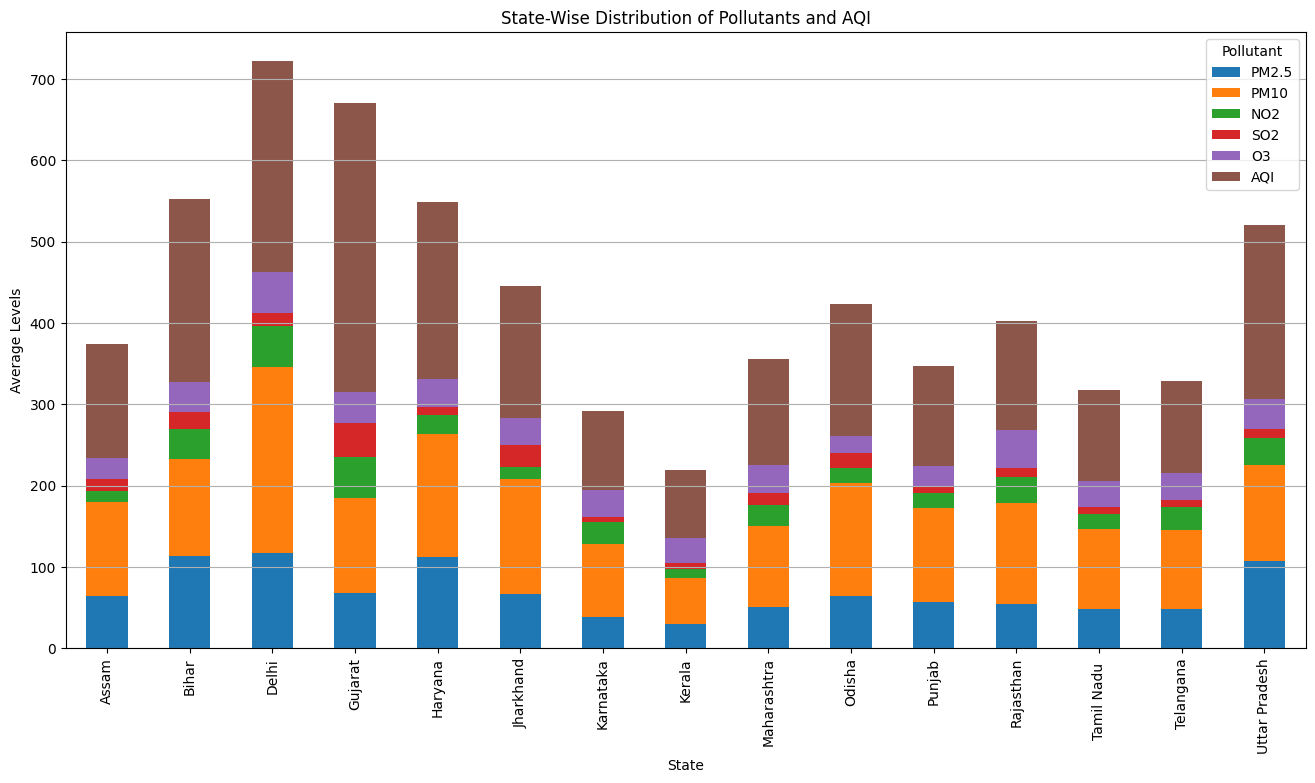

In [ ]:
#States with consistently high pollutant levels (e.g., industrial regions) stand out, helping prioritize state-wise policy implementation.
# Merge datasets
merged_df = pd.merge(city_day, indian_cities, on='City', how='inner')

# Calculate state-wise average pollutant levels
state_pollutants = merged_df.groupby('State')[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI']].mean()

# Plot the results
state_pollutants.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('State-Wise Distribution of Pollutants and AQI')
plt.xlabel('State')
plt.ylabel('Average Levels')
plt.legend(title='Pollutant')
plt.grid(axis='y')
plt.show()
